In [1]:

import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def GetFileOutPutName(prefix):
  #  return 'solution.csv'
  return 'Kaggle-Submission\\' + prefix + '-' + datetime.now().strftime("%Y%m%d-%I%M%S%p") + '.csv'


def CountEmergencyInstances(keyword):
  # count the number of times that this keyword is used
  subset = disaster_train[(disaster_train["keyword"] == keyword) & (disaster_train["target"] == 1)]
  return subset.shape[0] # returns the number of rows in the dataframe


In [3]:
# EOD section - evaluate the existing data

# read sampledata 

import pandas as pd
import tensorflow as tf
import numpy as np

disaster_test  = pd.read_csv('sampledata/test.csv')
disaster_train = pd.read_csv('sampledata/train.csv')

train_keywords = disaster_train['keyword'].value_counts()
print("number of training keywords = " + str(len(train_keywords)))

test_keywords = disaster_test['keyword'].value_counts()
print("number of test keywords = " + str(len(test_keywords)))

for index, value in train_keywords.items():
    print(f"{index}, count = {value} EmergencyInstances = {CountEmergencyInstances(index)}")

disaster_test_index = pd.DataFrame(disaster_test['id'])


number of training keywords = 221
number of test keywords = 221
fatalities, count = 45 EmergencyInstances = 26
deluge, count = 42 EmergencyInstances = 6
armageddon, count = 42 EmergencyInstances = 5
sinking, count = 41 EmergencyInstances = 8
damage, count = 41 EmergencyInstances = 19
harm, count = 41 EmergencyInstances = 4
body%20bags, count = 41 EmergencyInstances = 1
outbreak, count = 40 EmergencyInstances = 39
evacuate, count = 40 EmergencyInstances = 25
fear, count = 40 EmergencyInstances = 5
collided, count = 40 EmergencyInstances = 23
siren, count = 40 EmergencyInstances = 5
twister, count = 40 EmergencyInstances = 5
windstorm, count = 40 EmergencyInstances = 16
sinkhole, count = 39 EmergencyInstances = 27
sunk, count = 39 EmergencyInstances = 9
hellfire, count = 39 EmergencyInstances = 7
weapon, count = 39 EmergencyInstances = 14
weapons, count = 39 EmergencyInstances = 17
famine, count = 39 EmergencyInstances = 26
explosion, count = 39 EmergencyInstances = 20
whirlwind, count =

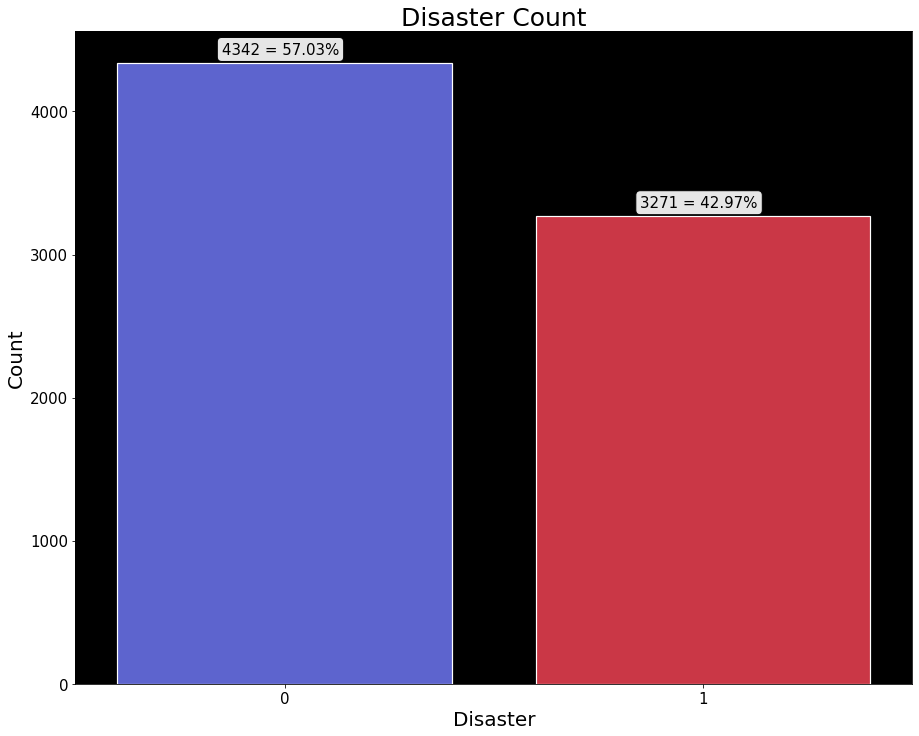

In [4]:
custom_colors = ['#000000', '#E31E33', '#4A53E1', '#F5AD02', '#94D5EA', '#F6F8F7']
custom_palette = sns.set_palette(sns.color_palette(custom_colors))

plt.figure(figsize = (15, 12))
ax = plt.axes()
ax.set_facecolor('black')
ax = sns.countplot(x = 'target', data = disaster_train, palette = [custom_colors[2], custom_colors[1]], edgecolor = 'white', linewidth = 1.2)
plt.title('Disaster Count', fontsize = 25)
plt.xlabel('Disaster', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
ax.xaxis.set_tick_params(labelsize = 15)
ax.yaxis.set_tick_params(labelsize = 15)
bbox_args = dict(boxstyle = 'round', fc = '0.9')
for p in ax.patches:
        ax.annotate('{:.0f} = {:.2f}%'.format(p.get_height(), (p.get_height() / len(disaster_train['target'])) * 100), (p.get_x() + 0.25, p.get_height() + 60), 
                   color = 'black',
                   bbox = bbox_args,
                   fontsize = 15)
plt.show()

In [5]:
new_df0=disaster_train[disaster_train['target']==0]
new_df1=disaster_train[disaster_train['target']==1]

new_df0=new_df0.sample(new_df1.shape[0]) #generating random samples from majority class same as of the minority class

disaster_train=pd.concat([new_df0,new_df1],axis=0)   #appending both the classes with equal number of observations

from sklearn.utils import shuffle   #shuffling the values
disaster_train = shuffle(disaster_train)

disaster_train=disaster_train.reset_index(drop=True)

In [6]:
# %20 is the URL encoding of space, let's replace them with '_'
def re_encode_space(input_string):
    return None if pd.isna(input_string) else input_string.replace('%20', '_')


# Let's try to find hastags
import re

def find_hash_tags(input_string):
    hash_tags = re.findall(r"#(\w+)", str(input_string))
    return ','.join(hash_tags)


# Let's turn hashtags to normal words
def re_encode_hashtags(input_string):
    return None if pd.isna(input_string) else input_string.replace('#', '')


# Let's remove URLs from the tweets
def remove_links(input_string):
    res = input_string
    urls = re.findall(r'(https?://[^\s]+)', res)
    for link in urls:
        res = res.strip(link)
    return res


# Let's remove the state abbreviations
def state_renaming(input_string):

    states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District_of_Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NC': 'North_Carolina',
        'ND': 'North_Dakota',
        'NE': 'Nebraska',
        'NH': 'New_Hampshire',
        'NJ': 'New_Jersey',
        'NM': 'New_Mexico',
        'NV': 'Nevada',
        'NY': 'New_York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'RI': 'Rhode_Island',
        'SC': 'South_Carolina',
        'SD': 'South_Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West_Virginia',
        'WY': 'Wyoming'
    }

    result = input_string
    
    if isinstance(input_string, str):
        input_candidates = input_string.split(', ')
        
        if len(input_candidates) > 1:
            for candidate in input_candidates:
                if candidate in states.keys():
                    result = states[candidate]
                
    if input_string in states.keys():
        result = states[input_string]

    return result

In [7]:
# Let's wrap the preprocessing functions so it's easier to
# process both train and test dataset
def preprocess_data(input_data):
    input_df = input_data.copy()
    input_df['keyword'] = input_df['keyword'].map(re_encode_space)
    input_df['keyword'].fillna('Missing', inplace=True)
    input_df['hashtags'] = input_df['text'].map(find_hash_tags)
    input_df['text'] = input_df['text'].map(re_encode_hashtags)
    input_df['text'] = input_df['text'].map(remove_links)
    input_df['location'] = input_df['location'].map(state_renaming)
    return input_df

In [8]:
original_data = preprocess_data(disaster_train)
test_data = preprocess_data(disaster_test)

X = original_data['text']
y = original_data['target']



In [9]:
from nltk.tokenize import TweetTokenizer
# The tokenizer is responsible to turn a string of words
# into a list of tokens (words) for which we'll get their
# vector representation (embeddings)
tknzr = TweetTokenizer(
    preserve_case=False,
    reduce_len=True,
    strip_handles=True,
)


def tokenize_tweets(tokenizer, input_text):
    tokens = list(tokenizer.tokenize(input_text))
    tokens = [re.sub('[^A-Za-z0-9]+', '', i) for i in tokens]
    return tokens

original_data['tokens'] = original_data['text']
original_data['tokens'] = original_data['tokens'].apply(lambda x: tokenize_tweets(tknzr, x))

test_data['tokens'] = test_data['text'].apply(lambda x: tokenize_tweets(tknzr, x))

# We'll pad all embeddings to match the length of the biggest tweet
# in order to account for the variability in tweet length
# Later on the model is going to mask the padded values, so that
# they won't influence the result
max_tweet_length = max(original_data['tokens'].apply(lambda x: len(x)).max(), 
                       test_data['tokens'].apply(lambda x: len(x)).max())

X = original_data['text'].tolist()
y = np.asarray(original_data['target'].tolist()).astype(np.float32)

test_array = test_data['text'].tolist()



In [10]:
from transformers import AutoTokenizer, AutoConfig,TFBertModel

bert_tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
bert = TFBertModel.from_pretrained('bert-base-uncased')

X = bert_tokenizer(
    text=X,
    add_special_tokens=True,
    max_length=max_tweet_length,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

test_array = bert_tokenizer(
    text=test_array,
    add_special_tokens=True,
    max_length=max_tweet_length,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)



Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


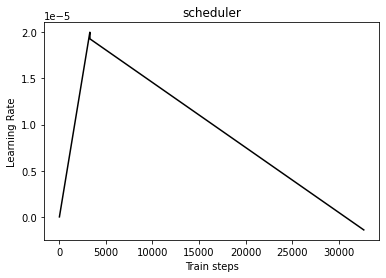

In [11]:
epochs = 5
steps_per_epoch = X['input_ids'].numpy().shape[0]
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

class BertLrSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):

    @tf.function
    def __init__(self, initial_learning_rate, num_warmups, num_train_steps):
        self.overshoot = 1000
        self.initial_learning_rate = initial_learning_rate
        self.num_warmups = num_warmups
        self.num_train_steps = num_train_steps
        self.angle_warm = self.initial_learning_rate / self.num_warmups
        self.angle_decay = - self.initial_learning_rate / \
            (self.num_train_steps - self.num_warmups - self.overshoot)
    
    @tf.function
    def __call__(self, step):
        if step <= self.num_warmups:
            return (tf.cast(step, tf.float32) + 1) * self.angle_warm
        else:
            return self.initial_learning_rate + (tf.cast(step, tf.float32) - self.num_warmups + 1 + self.overshoot) * self.angle_decay
        
        
schedule = BertLrSchedule(initial_learning_rate=2e-5, 
                          num_warmups=num_warmup_steps, 
                          num_train_steps=num_train_steps)

steps = np.arange(num_train_steps)
lrs = [schedule.__call__(i) for i in steps]

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1)
ax.plot(steps, lrs)
ax.set_xlabel('Train steps')
ax.set_ylabel('Learning Rate')
ax.set_title('scheduler')
plt.show()

In [31]:
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

from sklearn.model_selection import StratifiedKFold

def build_bert_classifier():
    input_ids = tf.keras.layers.Input(shape=(max_tweet_length,), dtype=tf.int32, name="input_ids")
    input_mask = tf.keras.layers.Input(shape=(max_tweet_length,), dtype=tf.int32, name="attention_mask")
    embeddings = bert(input_ids,attention_mask = input_mask)['pooler_output']
    net = tf.keras.layers.Dropout(0.1)(embeddings)
    net = tf.keras.layers.Dense(128, activation='relu', name='pre-clf')(net)
    net = tf.keras.layers.Dropout(0.1)(net)
    net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
    return tf.keras.Model(inputs=[input_ids, input_mask], outputs=net)

skf = StratifiedKFold(n_splits=5)
train_average_score = 0
validation_average_score = 0
validation_oof_predictions = np.zeros((len(X['input_ids'].numpy())))

loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
optimizer = Adam(learning_rate=schedule)
epochs = 5

# It's a good practice to predict the test set on every fold
# And average the predictions over the folds
averaged_test_predictions = np.zeros((test_array['input_ids'].shape[0]))

# It's standard practice to use Stratified k-fold cross validation
# so we're also using it here
for fold_n, (train_idx, test_idx) in enumerate(skf.split(X['input_ids'].numpy(), y)):
    X_train_ids = X['input_ids'].numpy()[train_idx]
    X_train_att = X['attention_mask'].numpy()[train_idx]
    y_train = y[train_idx]
    
    X_test_ids = X['input_ids'].numpy()[test_idx]
    X_test_att = X['attention_mask'].numpy()[test_idx]
    y_test = y[test_idx]
    
    # Re-build the model at every fold to "reset" it
    model = build_bert_classifier()
    model.layers[2].trainable = True
    
    model.compile(optimizer=optimizer,
                  loss=loss)
    
    model.fit(x={'input_ids':X_train_ids,'attention_mask':X_train_att}, 
              y=y_train, batch_size=32, epochs=epochs)
    
    train_predictions = model.predict({'input_ids':X_train_ids,'attention_mask':X_train_att})
    validation_predictions = model.predict({'input_ids':X_test_ids,'attention_mask':X_test_att})
    
    train_score = roc_auc_score(y_train, train_predictions)
    validation_score = roc_auc_score(y_test, validation_predictions)
    
    train_average_score += train_score / 5
    validation_average_score += validation_score / 5
    validation_oof_predictions[test_idx,] = (validation_predictions > 0.5).astype(int).flatten()
    
    print(f'Fold: {fold_n}, train auc: {train_score:.3f}, validation auc: {validation_score:.3f}')
    
    test_predictions = model.predict({'input_ids':test_array['input_ids'],
                                      'attention_mask':test_array['attention_mask']}).flatten()
    averaged_test_predictions += test_predictions / 5
    
print(f'Train average: {train_average_score:.3f}, validation average: {validation_average_score:.3f}')
print(f'OOF Accuracy Score: {accuracy_score(y, validation_oof_predictions)}')




Epoch 1/5
164/164 [==============================] - 628s 4s/step - loss: 0.7099
Epoch 2/5
164/164 [==============================] - 619s 4s/step - loss: 0.6202
Epoch 3/5
164/164 [==============================] - 618s 4s/step - loss: 0.4888
Epoch 4/5
164/164 [==============================] - 615s 4s/step - loss: 0.4174
Epoch 5/5
164/164 [==============================] - 622s 4s/step - loss: 0.3807
Fold: 0, train auc: 0.942, validation auc: 0.880
Epoch 1/5
164/164 [==============================] - 642s 4s/step - loss: 0.3794
Epoch 2/5
164/164 [==============================] - 631s 4s/step - loss: 0.3316
Epoch 3/5
164/164 [==============================] - 632s 4s/step - loss: 0.2860
Epoch 4/5
164/164 [==============================] - 625s 4s/step - loss: 0.2456
Epoch 5/5
164/164 [==============================] - 651s 4s/step - loss: 0.2062
Fold: 1, train auc: 0.983, validation auc: 0.930
Epoch 1/5
164/164 [==============================] - 674s 4s/step - loss: 0.2595
Epoch 2/5
1

In [34]:


import pandas as pd
from datetime import datetime
import numpy as np
import re
import os

def GetFileOutPutName(prefix):
  #  return 'solution.csv'
  return 'Kaggle-Submission\\' + prefix + '-' + datetime.now().strftime("%Y%m%d-%I%M%S%p") + '.csv'

def RoundPredictionVal(val):
    x = round(val)
    if x > 0:
        return 1
    else:
        return 0
    # return x

#averaged_test_predictions

# pd_predict = pd.DataFrame(predictions, columns = ['target'])
disaster_test_index['target'] = averaged_test_predictions
disaster_test_index['target'] = disaster_test_index['target'].apply(RoundPredictionVal)

# pd_predict.index = np.arange(1, len(pd_predict)+1)
output = GetFileOutPutName("Neuralnet-RNN")

disaster_test_index.to_csv(output, index=False)





